In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import sqlite3
%matplotlib inline
from IPython.core.display import HTML
pd.options.display.max_columns = 50
import seaborn as sb
import datetime
HTML("<style>.container { width:100% !important; }</style>")

## Excel 1 and 2: first names boys and girls

Voornamen_Jongens_1995-2014_tcm325-239464.xls <br>
Voornamen_meisjes_1995-2014_tcm325-239448.xls

In [2]:
data_dir = 'raw_data/'
filename_jongens = 'Voornamen_Jongens_1995-2014_tcm325-239464.xls'
filename_meisjes = 'Voornamen_meisjes_1995-2014_tcm325-239448.xls'

In [3]:
region_column_ranges = {'Belgie':'1,3','Brussel':'4,6','Vlaanderen':'7,9', 'Wallonie':'10,12'  }

In [4]:
voornamen = None
# Meisjes, filename_meisjes
for year in np.arange(1995, 2015):
    print('Reading tab %i of girls' %year)
    raw_data_sheet = pd.read_excel(data_dir + filename_meisjes , sheetname=str(year))
    for key, column_range in region_column_ranges.items():
        columns = re.split(pattern = ',',string = column_range)
        raw_data_region = raw_data_sheet.iloc[:,int(columns[0]):int(columns[1])]
        raw_data_region.columns = ['Name', 'Count']
        raw_data_region = raw_data_region.loc[raw_data_region['Name'].notnull(),:]
        raw_data_region['Year'] = year
        raw_data_region['Region'] = key
        raw_data_region['Sex'] = 'F'
        if(voornamen is not None):
            voornamen = pd.concat([voornamen, raw_data_region], axis = 0)
        else:
            voornamen = raw_data_region
# Jongens, filename_jongens
for year in np.arange(1995, 2015):
    print('Reading tab %i of boys' %year)
    raw_data_sheet = pd.read_excel(data_dir + filename_jongens , sheetname=str(year))
    for key, column_range in region_column_ranges.items():
        columns = re.split(pattern = ',',string = column_range)
        raw_data_region = raw_data_sheet.iloc[:,int(columns[0]):int(columns[1])]
        raw_data_region.columns = ['Name', 'Count']
        raw_data_region = raw_data_region.loc[raw_data_region['Name'].notnull(),:]
        raw_data_region['Year'] = year
        raw_data_region['Region'] = key
        raw_data_region['Sex'] = 'M'
        voornamen = pd.concat([voornamen, raw_data_region], axis = 0)
voornamen.head()    

Reading tab 1995 of girls
Reading tab 1996 of girls
Reading tab 1997 of girls
Reading tab 1998 of girls
Reading tab 1999 of girls
Reading tab 2000 of girls
Reading tab 2001 of girls
Reading tab 2002 of girls
Reading tab 2003 of girls
Reading tab 2004 of girls
Reading tab 2005 of girls
Reading tab 2006 of girls
Reading tab 2007 of girls
Reading tab 2008 of girls
Reading tab 2009 of girls
Reading tab 2010 of girls
Reading tab 2011 of girls
Reading tab 2012 of girls
Reading tab 2013 of girls
Reading tab 2014 of girls
Reading tab 1995 of boys
Reading tab 1996 of boys
Reading tab 1997 of boys
Reading tab 1998 of boys
Reading tab 1999 of boys
Reading tab 2000 of boys
Reading tab 2001 of boys
Reading tab 2002 of boys
Reading tab 2003 of boys
Reading tab 2004 of boys
Reading tab 2005 of boys
Reading tab 2006 of boys
Reading tab 2007 of boys
Reading tab 2008 of boys
Reading tab 2009 of boys
Reading tab 2010 of boys
Reading tab 2011 of boys
Reading tab 2012 of boys
Reading tab 2013 of boys
Readi

,Name,Count,Year,Region,Sex
0,Sarah,146.0,1995,Brussel,F
1,Laura,124.0,1995,Brussel,F
2,Marie,72.0,1995,Brussel,F
3,Céline,70.0,1995,Brussel,F
4,Yousra,59.0,1995,Brussel,F


## Excel three: first names of all population, men and women

firstnamesallages2013_nl_tcm325-237356.xls <br><br>

Mega annoying data excel structure

In [7]:
all_ages_column_range = {'all_ages':{'Belgie':'0,1','Vlaanderen':'2,3','Wallonie':'4,5', 'Brussel':'6,7'}}
age_groups_column_range = {'Belgie':{'minus18':'8,9','between18and64':'10,11','plus64':'12,13'},
                         'Vlaanderen':{'minus18':'14,15','between18and64':'16,17','plus64':'18,19'},
                         'Wallonie':{'minus18':'20,21','between18and64':'22,23','plus64':'24,25'},
                         'Brussel':{'minus18':'26,27','between18and64':'28,29','plus64':'30,31'}}

In [8]:
# First read in all ages
all_names = None
# Males, first three columns, all ages
raw_data_sheet = pd.read_excel(data_dir + 'firstnamesallages2013_nl_tcm325-237356.xls' , sheetname='mannen', skiprows=2, header=None)
raw_data_sheet = raw_data_sheet.drop([0,3,6,9, 12, 13,16, 19,22,25,28,31,34, 37,40, 43, 46], axis = 1)
print('Excel read in, sheet mannen')
for region, column_range in all_ages_column_range['all_ages'].items():
    column_start, column_finish = re.split(',', column_range)
    raw_data_region_age_range = raw_data_sheet.iloc[:,int(column_start):int(column_finish)+1]
    raw_data_region_age_range.columns = ['Name', 'Count']
    raw_data_region_age_range = raw_data_region_age_range.loc[raw_data_region_age_range['Name'].notnull(),:]
    raw_data_region_age_range['Age_range'] = 'all_ages'
    raw_data_region_age_range['Region'] = region
    raw_data_region_age_range['Sex'] = 'M'
    if(all_names is not None):
        all_names = pd.concat([all_names, raw_data_region_age_range], axis = 0)
    else:
        all_names = raw_data_region_age_range
# Males, all other age ranges
for region, age_ranges in age_groups_column_range.items():
    for age_range, column_range in age_ranges.items():
        column_start, column_finish = re.split(',', column_range)
        raw_data_region_age_range = raw_data_sheet.iloc[:,int(column_start):int(column_finish)+1]
        raw_data_region_age_range.columns = ['Name', 'Count']
        raw_data_region_age_range = raw_data_region_age_range.loc[raw_data_region_age_range['Name'].notnull(),:]
        raw_data_region_age_range['Age_range'] = age_range
        raw_data_region_age_range['Region'] = region
        raw_data_region_age_range['Sex'] = 'M'
        all_names = pd.concat([all_names, raw_data_region_age_range], axis = 0)
# First read first three columns, mega annoying data excel structure
raw_data_sheet = pd.read_excel(data_dir + 'firstnamesallages2013_nl_tcm325-237356.xls' , sheetname='vrouwen', skiprows=2, header=None)
raw_data_sheet = raw_data_sheet.drop([0,3,6,9, 12, 13,16, 19,22,25,28,31,34, 37,40, 43, 46], axis = 1)
print('Excel read in, sheet vrouwen')
for region, column_range in all_ages_column_range['all_ages'].items():
    column_start, column_finish = re.split(',', column_range)
    raw_data_region_age_range = raw_data_sheet.iloc[:,int(column_start):int(column_finish)+1]
    raw_data_region_age_range.columns = ['Name', 'Count']
    raw_data_region_age_range = raw_data_region_age_range.loc[raw_data_region_age_range['Name'].notnull(),:]
    raw_data_region_age_range['Age_range'] = 'all_ages'
    raw_data_region_age_range['Region'] = region
    raw_data_region_age_range['Sex'] = 'F'
    all_names = pd.concat([all_names, raw_data_region_age_range], axis = 0)
# Women, all other age ranges
for region, age_ranges in age_groups_column_range.items():
    for age_range, column_range in age_ranges.items():
        column_start, column_finish = re.split(',', column_range)
        raw_data_region_age_range = raw_data_sheet.iloc[:,int(column_start):int(column_finish)+1]
        raw_data_region_age_range.columns = ['Name', 'Count']
        raw_data_region_age_range = raw_data_region_age_range.loc[raw_data_region_age_range['Name'].notnull(),:]
        raw_data_region_age_range['Age_range'] = age_range
        raw_data_region_age_range['Region'] = region
        raw_data_region_age_range['Sex'] = 'F'
        all_names = pd.concat([all_names, raw_data_region_age_range], axis = 0)
print(all_names.tail())

Excel read in, sheet mannen
Excel read in, sheet vrouwen
           Name  Count Age_range   Region Sex
1154      Zaina    5.0    plus64  Brussel   F
1155     Zarife    5.0    plus64  Brussel   F
1156      Zhour    5.0    plus64  Brussel   F
1157    Zolikha    5.0    plus64  Brussel   F
1158  Zsuzsanna    5.0    plus64  Brussel   F


In [10]:
# Some tests tot see that all data is read in correctly
all_names.loc[all_names['Name'] == 'Kasper',:]
all_names.loc[all_names['Name'] == 'Caroline',:]
#all_names.sample(10)

,Name,Count,Age_range,Region,Sex
25,Caroline,9833.0,all_ages,Wallonie,F
22,Caroline,23815.0,all_ages,Belgie,F
33,Caroline,11905.0,all_ages,Vlaanderen,F
23,Caroline,2077.0,all_ages,Brussel,F
18,Caroline,8618.0,between18and64,Wallonie,F
53,Caroline,1146.0,minus18,Wallonie,F
407,Caroline,69.0,plus64,Wallonie,F
16,Caroline,21481.0,between18and64,Belgie,F
91,Caroline,1972.0,minus18,Belgie,F
353,Caroline,362.0,plus64,Belgie,F


## Create wide pivot table

In [11]:
# Pivot table of voornamen
voornamen_pivot = voornamen.pivot_table(index = ['Name', 'Sex', 'Region'], values = 'Count', columns = 'Year').fillna(0).reset_index()
voornamen_pivot.head()

Year,Name,Sex,Region,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Aagje,F,Belgie,0.0,10.0,7.0,6.0,5.0,5.0,12.0,10.0,8.0,10.0,19.0,11.0,10.0,11.0,12.0,11.0,8.0,11.0,7.0,0.0
1,Aagje,F,Vlaanderen,0.0,10.0,7.0,6.0,5.0,0.0,12.0,10.0,8.0,10.0,19.0,10.0,10.0,11.0,12.0,11.0,8.0,11.0,7.0,0.0
2,Aaliyah,F,Belgie,0.0,0.0,0.0,0.0,0.0,0.0,11.0,18.0,22.0,19.0,14.0,22.0,17.0,20.0,24.0,18.0,18.0,20.0,26.0,31.0
3,Aaliyah,F,Brussel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0
4,Aaliyah,F,Vlaanderen,0.0,0.0,0.0,0.0,0.0,0.0,5.0,10.0,14.0,10.0,8.0,10.0,8.0,7.0,14.0,9.0,9.0,7.0,10.0,11.0


In [12]:
# Totals per year
totals = voornamen[['Region', 'Sex', 'Count', 'Year']].groupby(['Region', 'Sex', 'Year']).agg('sum').reset_index().copy()
totals = totals.pivot_table(columns = 'Year', index = ['Sex', 'Region'], values = 'Count')
totals.head()

Year               1995     1996     1997     1998     1999     2000     2001  \
Sex Region                                                                      
F   Belgie      48486.0  48926.0  48548.0  47684.0  47188.0  47603.0  47011.0   
    Brussel      4059.0   3969.0   3814.0   3984.0   4016.0   4127.0   4455.0   
    Vlaanderen  26150.0  26270.0  26027.0  25222.0  24777.0  24600.0  23663.0   
    Wallonie    15500.0  15846.0  15716.0  15487.0  15238.0  15895.0  15553.0   
M   Belgie      52332.0  52426.0  52184.0  51495.0  50655.0  51320.0  50330.0   

Year               2002     2003     2004     2005     2006     2007     2008  \
Sex Region                                                                      
F   Belgie      45116.0  45469.0  46186.0  46957.0  48572.0  47448.0  50592.0   
    Brussel      4100.0   4309.0   4316.0   4368.0   4410.0   4574.0   4988.0   
    Vlaanderen  23071.0  23146.0  23758.0  24214.0  25003.0  24868.0  26445.0   
    Wallonie    14593.0  14506.0  14531.0  14644.0  15123.0  14373.0  14806.0   
M   Belgie      48878.0  49026.0  50725.0  51523.0  52352.0  51827.0  55038.0   

Year               2009     2010     2011     2012     2013     2014  
Sex Region                                                            
F   Belgie      50134.0  50940.0  50156.0  49827.0  48503.0  47881.0  
    Brussel      5097.0   5187.0   5249.0   5233.0   5064.0   5299.0  
    Vlaanderen  25741.0  26392.0  25853.0  25456.0  25050.0  24640.0  
    Wallonie    15022.0  14803.0  14671.0  14601.0  14049.0  13635.0  
M   Belgie      54464.0  55047.0  54450.0  53580.0  52672.0  52891.0

In [13]:
# Pivot table of all names
all_names_pivot = all_names.pivot_table(values = 'Count', columns = 'Age_range', index = ['Name', 'Sex', 'Region']).reset_index()
all_names_pivot.head()

Age_range,Name,Sex,Region,all_ages,between18and64,minus18,plus64
0,Aad,M,Belgie,9.0,7.0,NaN,NaN
1,Aad,M,Vlaanderen,9.0,7.0,NaN,NaN
2,Aadam,M,Belgie,9.0,NaN,8.0,NaN
3,Aadam,M,Vlaanderen,8.0,NaN,7.0,NaN
4,Aadel,M,Belgie,9.0,6.0,NaN,NaN


In [14]:
# Merge the two
voornamen_pivot = pd.merge(voornamen_pivot, all_names_pivot, how = 'outer',
                           left_on = ['Name', 'Sex', 'Region'], right_on = ['Name', 'Sex', 'Region'] )
voornamen_pivot.head()

,Name,Sex,Region,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,all_ages,between18and64,minus18,plus64
0,Aagje,F,Belgie,0.0,10.0,7.0,6.0,5.0,5.0,12.0,10.0,8.0,10.0,19.0,11.0,10.0,11.0,12.0,11.0,8.0,11.0,7.0,0.0,325.0,146.0,171.0,8.0
1,Aagje,F,Vlaanderen,0.0,10.0,7.0,6.0,5.0,0.0,12.0,10.0,8.0,10.0,19.0,10.0,10.0,11.0,12.0,11.0,8.0,11.0,7.0,0.0,318.0,141.0,170.0,7.0
2,Aaliyah,F,Belgie,0.0,0.0,0.0,0.0,0.0,0.0,11.0,18.0,22.0,19.0,14.0,22.0,17.0,20.0,24.0,18.0,18.0,20.0,26.0,31.0,227.0,NaN,227.0,NaN
3,Aaliyah,F,Brussel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,23.0,NaN,23.0,NaN
4,Aaliyah,F,Vlaanderen,0.0,0.0,0.0,0.0,0.0,0.0,5.0,10.0,14.0,10.0,8.0,10.0,8.0,7.0,14.0,9.0,9.0,7.0,10.0,11.0,115.0,NaN,115.0,NaN


,Name,Sex,Region,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,all_ages,between18and64,minus18,plus64,Total_all_ages,Mininum_all_ages,Maximum_all_ages,Total_plus_64,Mininum_plus_64,Maximum_plus_64,Total_between18and64,Mininum_between18and64,Maximum_between18and64,Total_minus18,Mininum_minus18,Maximum_minus18
0,Aagje,F,Belgie,0.0,10.0,7.0,6.0,5.0,5.0,12.0,10.0,8.0,10.0,19.0,11.0,10.0,11.0,12.0,11.0,8.0,11.0,7.0,0.0,325.0,146.0,171.0,8.0,5484640.0,5.0,154184.0,1098965.0,5.0,95891.0,3314571.0,5.0,56712.0,1029492.0,5.0,13873.0
1,Aagje,F,Vlaanderen,0.0,10.0,7.0,6.0,5.0,0.0,12.0,10.0,8.0,10.0,19.0,10.0,10.0,11.0,12.0,11.0,8.0,11.0,7.0,0.0,318.0,141.0,170.0,7.0,3127977.0,5.0,120289.0,659591.0,5.0,82368.0,1882638.0,5.0,37353.0,558512.0,5.0,7427.0
2,Aaliyah,F,Belgie,0.0,0.0,0.0,0.0,0.0,0.0,11.0,18.0,22.0,19.0,14.0,22.0,17.0,20.0,24.0,18.0,18.0,20.0,26.0,31.0,227.0,NaN,227.0,NaN,5484640.0,5.0,154184.0,1098965.0,5.0,95891.0,3314571.0,5.0,56712.0,1029492.0,5.0,13873.0
3,Aaliyah,F,Brussel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,23.0,NaN,23.0,NaN,536054.0,5.0,11813.0,85286.0,5.0,5084.0,331078.0,5.0,7870.0,105883.0,5.0,1569.0
4,Aaliyah,F,Vlaanderen,0.0,0.0,0.0,0.0,0.0,0.0,5.0,10.0,14.0,10.0,8.0,10.0,8.0,7.0,14.0,9.0,9.0,7.0,10.0,11.0,115.0,NaN,115.0,NaN,3127977.0,5.0,120289.0,659591.0,5.0,82368.0,1882638.0,5.0,37353.0,558512.0,5.0,7427.0


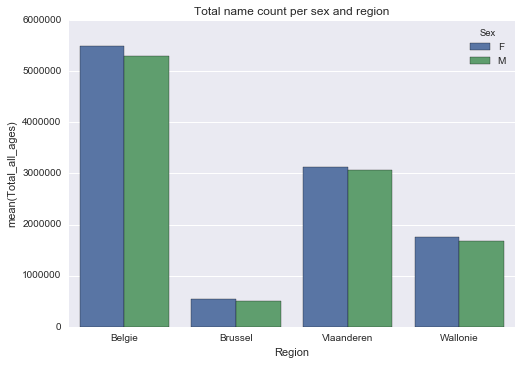

In [15]:
# Aggregates of counts of all ages
group_by = voornamen_pivot[['Name','Sex', 'Region', 'all_ages']].dropna(0).groupby(['Sex', 'Region'])['all_ages']

totals_all_ages = group_by.agg('sum').reset_index()
totals_all_ages.columns = ['Sex', 'Region', 'Total_all_ages']
min_all_ages = group_by.agg('min').reset_index()
min_all_ages.columns = ['Sex', 'Region', 'Mininum_all_ages']
max_all_ages = group_by.agg('max').reset_index()
max_all_ages.columns = ['Sex', 'Region', 'Maximum_all_ages']

sb.barplot(data = totals_all_ages, x = 'Region', y = 'Total_all_ages', hue = 'Sex')
plt.title('Total name count per sex and region')

voornamen_pivot = pd.merge(voornamen_pivot, totals_all_ages, how = 'left', left_on=['Sex', 'Region'], right_on = ['Sex', 'Region'])
voornamen_pivot = pd.merge(voornamen_pivot, min_all_ages, how = 'left', left_on=['Sex', 'Region'], right_on = ['Sex', 'Region'])
voornamen_pivot = pd.merge(voornamen_pivot, max_all_ages, how = 'left', left_on=['Sex', 'Region'], right_on = ['Sex', 'Region'])

# Aggregates of counts plus 64
group_by = voornamen_pivot[['Name','Sex', 'Region', 'plus64']].dropna().groupby(['Sex', 'Region'])['plus64']

totals_plus_64 = group_by.agg('sum').reset_index()
totals_plus_64.columns = ['Sex', 'Region', 'Total_plus_64']
min_plus_64 = group_by.agg('min').reset_index()
min_plus_64.columns = ['Sex', 'Region', 'Mininum_plus_64']
max_plus_64 = group_by.agg('max').reset_index()
max_plus_64.columns = ['Sex', 'Region', 'Maximum_plus_64']

voornamen_pivot = pd.merge(voornamen_pivot, totals_plus_64, how = 'left', left_on=['Sex', 'Region'], right_on = ['Sex', 'Region'])
voornamen_pivot = pd.merge(voornamen_pivot, min_plus_64, how = 'left', left_on=['Sex', 'Region'], right_on = ['Sex', 'Region'])
voornamen_pivot = pd.merge(voornamen_pivot, max_plus_64, how = 'left', left_on=['Sex', 'Region'], right_on = ['Sex', 'Region'])

# Aggregates of in between 18 and 64
group_by = voornamen_pivot[['Name','Sex', 'Region', 'between18and64']].dropna().groupby(['Sex', 'Region'])['between18and64']

totals_between18and64 = group_by.agg('sum').reset_index()
totals_between18and64.columns = ['Sex', 'Region', 'Total_between18and64']
min_between18and64 = group_by.agg('min').reset_index()
min_between18and64.columns = ['Sex', 'Region', 'Mininum_between18and64']
max_between18and64 = group_by.agg('max').reset_index()
max_between18and64.columns = ['Sex', 'Region', 'Maximum_between18and64']

voornamen_pivot = pd.merge(voornamen_pivot, totals_between18and64, how = 'left', left_on=['Sex', 'Region'], right_on = ['Sex', 'Region'])
voornamen_pivot = pd.merge(voornamen_pivot, min_between18and64, how = 'left', left_on=['Sex', 'Region'], right_on = ['Sex', 'Region'])
voornamen_pivot = pd.merge(voornamen_pivot, max_between18and64, how = 'left', left_on=['Sex', 'Region'], right_on = ['Sex', 'Region'])

# Aggregates of in minus 18
group_by = voornamen_pivot[['Name','Sex', 'Region', 'minus18']].dropna().groupby(['Sex', 'Region'])['minus18']

totals_minus18 = group_by.agg('sum').reset_index()
totals_minus18.columns = ['Sex', 'Region', 'Total_minus18']
min_minus18 = group_by.agg('min').reset_index()
min_minus18.columns = ['Sex', 'Region', 'Mininum_minus18']
max_minus18 = group_by.agg('max').reset_index()
max_minus18.columns = ['Sex', 'Region', 'Maximum_minus18']

voornamen_pivot = pd.merge(voornamen_pivot, totals_minus18, how = 'left', left_on=['Sex', 'Region'], right_on = ['Sex', 'Region'])
voornamen_pivot = pd.merge(voornamen_pivot, min_minus18, how = 'left', left_on=['Sex', 'Region'], right_on = ['Sex', 'Region'])
voornamen_pivot = pd.merge(voornamen_pivot, max_minus18, how = 'left', left_on=['Sex', 'Region'], right_on = ['Sex', 'Region'])

voornamen_pivot.head()

## Parameter Original

It doesn't occur often in the names within all_ages

In [ ]:
pivot_original = voornamen_pivot.copy()
pivot_original['log_all_ages'] = np.log(pivot_original['all_ages'] + 1)
pivot_original['Score_original'] = 1-(pivot_original['log_all_ages']-np.log(pivot_original['Mininum_all_ages']+1))/np.log(pivot_original['Maximum_all_ages']+1)

return_rank = lambda x:  (x.rank()/len(x))
subset = pivot_original.loc[pivot_original['Score_original'] != 1].copy()
subset['Score_original'] = subset.groupby(['Sex','Region'])['Score_original'].transform(return_rank)

pivot_original = pivot_original.drop('Score_original', axis=1)
pivot_original = pd.merge(pivot_original, subset[['Name', 'Region', 'Sex', 'Score_original']], how='left',
                        left_on=['Name', 'Region', 'Sex'], right_on = ['Name', 'Region', 'Sex'])
pivot_original['Score_original'] = np.ceil(pivot_original['Score_original']*8)/8*4
pivot_original['Score_original'] = pivot_original['Score_original'].fillna(4)

g = sb.FacetGrid(pivot_original, row="Sex", col="Region", margin_titles=True)
bins = np.linspace(0,4.5, num = 9)
g.map(plt.hist, "Score_original", color="steelblue", bins = bins,  lw=1)

In [ ]:
pivot_original['Score_original'].value_counts()

In [ ]:
pivot_original[['Score_original', 'Name', 'Region', 'Sex']].sample(20).sort_values(['Sex','Score_original'])

In [ ]:
def score_original(Name, Sex, Region):
    result_score = pivot_original.loc[(pivot_original['Name']==Name)&(pivot_original['Sex']==Sex)&(pivot_original['Region']==Region),'Score_original']
    if(len(result_score) == 0): return 5
    else: return float(result_score)

In [ ]:
test_name = 'Karel'
test_sex = 'M'
print(score_original(test_name, test_sex, 'Belgie'))
#all_names.loc[(all_names['Name'] == test_name)&(all_names['Sex'] == test_sex) ,:]

## Parameter vintage

Popular name amonst 65 plussers, not popular between 65-18

Vintage scores, higher is better<br>
Work only with a subset, otherwise too many zeros, which screws up the ranks, 
The name has to be known in age group older than 64 in order to be vintage<br>

Fill in missings: 
- if it never appeared between 18-65, score_vintage_2 = 1
- if it never appeared older than 65, score_vintage_1 = 0

Weight_between18and64<br>
Weight_plus64<br>
Give weight to the subscores

#### Examples
Felicienne (F), Hortentia(F), Jeanninne(F), Gommaire(M), Gérardus(M), Teofiel(M)

In [ ]:
Weight_between18and64 = 1
Weight_plus64 = 1

pivot_vintage = pivot_original.copy()

print('Only %.2f percent of names was already know 64 years ago' %(sum(pivot_vintage['plus64'].notnull())/len(pivot_vintage)))

return_rank = lambda x:  (x.rank()/len(x))

subset = pivot_vintage.loc[pivot_vintage['plus64'].notnull(),:].copy()

# First part of the score, how popular was it 64 years ago
subset['Score_vintage_1'] = (np.log(subset['plus64']+1)-np.log(subset['Mininum_plus_64']+1))/ \
                                    np.log(subset['Maximum_plus_64']+1)
subset['Score_vintage_1'] = subset.groupby(['Region', 'Sex'])['Score_vintage_1'].transform(return_rank)

# Second part, how popular is it in middle age
subset['Score_vintage_2'] = 1-(np.log(subset['between18and64']+1)-np.log(subset['Mininum_between18and64']+1))/ \
                                    np.log(subset['Maximum_between18and64']+1)
subset['Score_vintage_2'] = subset.groupby(['Region', 'Sex'])['Score_vintage_2'].transform(return_rank)
subset['Score_vintage_2'] = subset['Score_vintage_2'].fillna(1) # Fill in max score if not known in middle age

subset['Score_vitange_combined'] = (subset['Score_vintage_1']*Weight_plus64)*(subset['Score_vintage_2']*Weight_plus64)
subset['Score_vitange_combined'] = subset.groupby(['Sex','Region'])['Score_vitange_combined'].transform(return_rank)

subset['Score_vintage'] = np.ceil(subset['Score_vitange_combined'] * 8)/8*4

pivot_vintage = pd.merge(pivot_vintage, subset[['Name', 'Sex', 'Region', 'Score_vintage']], how = 'left',
                         left_on=['Name', 'Sex', 'Region'], right_on=['Name', 'Sex', 'Region'] )

g = sb.FacetGrid(pivot_vintage, row="Sex", col="Region", margin_titles=True)
bins = np.linspace(0,4.5, num = 9)
g.map(plt.hist, "Score_vintage", color="steelblue", lw=1, bins=bins)

pivot_vintage['Score_vintage'] = pivot_vintage['Score_vintage'].fillna(0)



In [ ]:
pivot_vintage.loc[(pivot_vintage['Score_vintage'] == 4)&
                  (pivot_vintage['Region'] =='Belgie'),
                  ['Name', 'Sex', 'Region', 'Score_vintage']].sample(20).sort_values(['Sex', 'Score_vintage'])

In [ ]:
def score_vintage(Name, Sex, Region):
    result_score = pivot_vintage.loc[(pivot_vintage['Name']==Name)&(pivot_vintage['Sex']==Sex)&(pivot_vintage['Region']==Region),'Score_vintage']
    if(len(result_score) == 0): return 5
    else: return float(result_score)   
score_vintage('Theofiel', 'M', 'Belgie')

## Parameter trending

First add trend for each name to pivot <br>
The trend is calculated by combining a weighted linear and quadratic regression<br>
The weights of the combination are set with:<br>
weight_lin_reg<br>
weight_quad_reg<br>


In [ ]:
# Set the weights for the weighted regression, trial and error
years = np.arange(1995, 2015)
weights = ((years+1 - np.min(years)) / len(years))**2.5
plt.plot(years, weights)
plt.title('Weights for regression')

In [ ]:
pivot_trend = pivot_vintage.copy()

weight_lin_reg = 10
weight_quad_reg = 1

# Subset nemen, anders is rank weer niet goed
# during the last 10 years, at least five years with more than one time more than 1
years = np.arange(2005, 2015,1)
boolean_subset = (pivot_trend[years] > 1).sum(axis=1) > 5
subset = pivot_trend.loc[boolean_subset,:].copy()

# Trend regression for each row in subset
years = np.arange(1995, 2015)
for row_number, counts in enumerate(subset[years].values):
    if(row_number%1000 == 0):print('Row number %i ' %row_number)
    # If not enough data points, don't calculate trend
    if(np.sum( counts[-10:]<5) > 5): 
        lin_a = np.nan
        lin_b = np.nan
        quad_a = np.nan
        quad_b = np.nan
        quad_c = np.nan
    else:
        # Linear trend
        lin_a,lin_b = np.polyfit((years-2014), counts, deg = 1, w = weights)
        # Quadratic trend, with weight towards the end
        
        quad_a,quad_b,quad_c = np.polyfit((years-2014), counts, deg = 2, w = weights)
        
    # Store results in lists, subsetting with pandas is super slow
    if row_number != 0:
        array_lin_a.extend([lin_a])
        array_lin_b.extend([lin_b])
        array_quad_a.extend([quad_a])
        array_quad_b.extend([quad_b])
        array_quad_c.extend([quad_c])
    else:
        array_lin_a = [lin_a]
        array_lin_b = [lin_b]
        array_quad_a = [quad_a]
        array_quad_b = [quad_b]
        array_quad_c = [quad_c]
    
subset['quad_trend_a'] = array_quad_a
subset['quad_trend_b'] = array_quad_b
subset['quad_trend_c'] = array_quad_c
subset['lin_trend_a'] = array_lin_a
subset['lin_trend_b'] = array_lin_b

# Every name with decreasing linear trend has trend zero, so delete out of subset
subset = subset.loc[subset['lin_trend_a'] > 0,:]

# Calucate for each region the trending parameter
subset['quad_rank_b'] = subset.groupby(['Region', 'Sex'])['quad_trend_b'].transform(return_rank)
subset['lin_rank_a'] = subset.groupby(['Region', 'Sex'])['quad_trend_b'].transform(return_rank)
subset['Score_trend'] = (subset['lin_rank_a']*weight_lin_reg) * (subset['quad_rank_b']*weight_quad_reg)
subset['Score_trend'] = subset.groupby(['Sex','Region'])['Score_trend'].transform(return_rank)
subset['Score_trend'] = np.ceil(subset['Score_trend']*8)/8*4

# Merge again with pivot
pivot_trend = pd.merge(pivot_trend, 
                       subset[['Name','Sex','Region','Score_trend','quad_trend_a','quad_trend_b','quad_trend_c','lin_trend_a','lin_trend_b']], 
                       how='left',left_on=['Name','Sex','Region'], right_on=['Name','Sex','Region'])

g = sb.FacetGrid(pivot_trend, row="Sex", col="Region", margin_titles=True)
bins = np.linspace(0,4.5, num = 9)
g.map(plt.hist, "Score_trend", color="steelblue", lw=1, bins = bins)

pivot_trend['Score_trend'] = pivot_trend['Score_trend'].fillna(0)

In [ ]:
pivot_trend['Score_trend'].value_counts()

In [ ]:
def score_trending(Name, Sex, Region):
    return_score = pivot_trend.loc[(pivot_trend['Name']==Name)&(pivot_trend['Sex']==Sex)&(pivot_trend['Region']==Region),'Score_trend']
    if(len(return_score) == 0):
        return 0
    else:
        return float(return_score)
score_trending('June', 'F', 'Vlaanderen')

## Parameter Classic

Has to be popular during all ages<br>
After some trial and error, give more weight to range 18-65.

If the name never occured to age range 18-65, it is not a classic

In [ ]:
weight_minus_18 = 5
weight_18_64 = 10
weight_plus_65 = 5

In [ ]:
pivot_classic = pivot_trend.copy()

subset = pivot_classic.loc[pivot_classic['between18and64'].notnull(),:]
subset = subset.loc[subset['minus18'].notnull(),:]
subset = subset.loc[subset['plus64'].notnull(),:].copy()

# Calculate the rank of the score in each age group, for each sex qnd region
subset['Score_classic_3']= (np.log(subset['plus64']+1)-np.log(subset['Mininum_plus_64']+1))/ \
                                    np.log(subset['Maximum_plus_64']+1)
subset['Score_classic_3'] = subset.groupby(['Region', 'Sex'])['Score_classic_3'].transform(return_rank)
subset['Score_classic_3'] = subset['Score_classic_3'].fillna(0)

subset['Score_classic_2']= (np.log(subset['between18and64']+1)-np.log(subset['Mininum_between18and64']+1))/ \
                                            np.log(subset['Maximum_between18and64']+1)
subset['Score_classic_2'] = subset.groupby(['Region', 'Sex'])['Score_classic_2'].transform(return_rank)
subset['Score_classic_2'] = subset['Score_classic_2'].fillna(0)


subset['Score_classic_1']= (np.log(subset['minus18']+1)-np.log(subset['Mininum_minus18']+1))/ np.log(subset['Maximum_minus18']+1)
subset['Score_classic_1'] = subset.groupby(['Region', 'Sex'])['Score_classic_1'].transform(return_rank)
subset['Score_classic_1'] = subset['Score_classic_1'].fillna(0)

# Combine the three ranks with weights
subset['Score_classic']=subset['Score_classic_3']*weight_plus_65 + \
                            subset['Score_classic_2']*weight_18_64 + \
                                subset['Score_classic_1']*weight_minus_18
subset['Score_classic'] = subset.groupby(['Region', 'Sex'])['Score_classic'].transform(return_rank)
subset['Score_classic'] = np.ceil((subset['Score_classic'])*8)/8*4

g = sb.FacetGrid(subset, row="Sex", col="Region", margin_titles=True)
bins = np.linspace(0,4.5, num = 9)
g.map(plt.hist, "Score_classic", color="steelblue", lw=1, bins=bins)

# Merge again
pivot_classic = pd.merge(pivot_classic, subset[['Name', 'Sex', 'Region', 'Score_classic']], how='left',
                         left_on=['Name', 'Sex', 'Region'], right_on=['Name', 'Sex', 'Region'])
pivot_classic['Score_classic'] = pivot_classic['Score_classic'] .fillna(0)

In [ ]:
def score_classic(Name, Sex, Region):
    return_score = pivot_classic.loc[(pivot_classic['Name']==Name)&(pivot_classic['Sex']==Sex)&(pivot_classic['Region']==Region),'Score_classic']
    if(len(return_score) == 0):
        return 0
    else:
        return float(return_score)
#score_trending('Marion', 'F', 'Belgie')
print(score_classic('Marion', 'F', 'Belgie'))

## Score popular

Based on occurences during the last five years


In [ ]:
pivot_popular = pivot_classic.copy()

pivot_popular['last_5_years']=pivot_popular[2014]+pivot_popular[2013]+pivot_popular[2012]+pivot_popular[2011]+pivot_popular[2010]

return_rank = lambda x:  (x.rank()/len(x))

groupby = pivot_popular.groupby(['Region', 'Sex'])['last_5_years']
last_5_years_min = groupby.agg('min').reset_index()
last_5_years_min.columns =['Region', 'Sex', 'last_5_years_min']
last_5_years_max = groupby.agg('max').reset_index()
last_5_years_max.columns =['Region', 'Sex', 'last_5_years_max']

pivot_popular = pd.merge(pivot_popular, last_5_years_min[['Region', 'Sex', 'last_5_years_min']], 
                         how='left',left_on=['Region', 'Sex'], right_on=['Region', 'Sex']  )
pivot_popular = pd.merge(pivot_popular, last_5_years_max[['Region', 'Sex', 'last_5_years_max']], 
                         how='left',left_on=['Region', 'Sex'], right_on=['Region', 'Sex']  )

pivot_popular['Score_popular'] = (np.log(pivot_popular['last_5_years']+1)-np.log(pivot_popular['last_5_years_min']+1))/ \
                                                (np.log(pivot_popular['last_5_years_max'])+1)

subset = pivot_popular.loc[pivot_popular['Score_popular'].notnull(),:].copy()

#subset['Score_popular'] = subset.groupby(['Sex', 'Region'])['Score_popular'].transform(return_rank)
subset['Score_popular'] = np.ceil(subset['Score_popular']*8)/8*4+0.5
subset['Score_popular'] = subset['Score_popular'].apply(lambda x: min(4, x))

pivot_popular = pivot_popular.drop('Score_popular', axis = 1)
pivot_popular = pd.merge(pivot_popular,subset[['Sex', 'Region', 'Score_popular', 'Name']], how='left',
                        left_on=['Sex', 'Region', 'Name'], right_on=['Sex', 'Region', 'Name'])
pivot_popular['Score_popular'] = pivot_popular['Score_popular'].fillna(0)

In [ ]:
pivot_popular['Score_popular'].value_counts()

In [ ]:
def score_popular(Name, Sex, Region):
    return_score = pivot_popular.loc[(pivot_popular['Name']==Name)&(pivot_popular['Sex']==Sex)&(pivot_popular['Region']==Region),'Score_popular']
    if(len(return_score) == 0):
        return 0
    else:
        return float(return_score)
#score_trending('Marion', 'F', 'Belgie')
print(score_popular('Louis', 'M', 'Vlaanderen'))

## Test five scores

In [ ]:
final_pivot = pivot_popular.copy()
final_pivot['plus64'] = final_pivot['plus64'].fillna(0)
final_pivot['minus18'] = final_pivot['minus18'].fillna(0)
final_pivot['between18and64'] = final_pivot['between18and64'].fillna(0)
final_pivot['all_ages'] = final_pivot['all_ages'].fillna(0)

In [ ]:
def smooth_regression(x, y, smoothing = 3):
    y_hat = []
    for x_i in x:
        weights = np.abs(x_i - x)
        weights = -(weights - np.max(weights))
        weights = weights / np.max(weights)
        weights = weights**smoothing
        lin_a,lin_b = np.polyfit(x, y, deg = 1, w = weights)
        y_hat.extend([lin_a * x_i + lin_b])
    return  y_hat   
def test_plot(Name, Sex, Region):
    subset = final_pivot.loc[final_pivot['Name'] == Name,:].loc[final_pivot['Sex'] == Sex,:].loc[final_pivot['Region'] == Region,:]
    if(len(subset)==0): return None
    plt.plot(years, subset[years].values[0], 'o')
    #plt.plot(years, subset['lin_trend_a'].values[0] * (years-2014) + subset['lin_trend_b'].values[0])
    #plt.plot(years, subset['quad_trend_a'].values[0]*np.square(years-2014)+subset['quad_trend_b'].values[0]*(years-2014)+subset['quad_trend_c'].values[0] )
    plt.ylim(ymin = 0, ymax = np.max(subset[years].values[0]) * 1.5)
    if(np.sum(subset[years].values[0] > 0) < 10): return None
    plt.plot(years, smooth_regression(x = years, y = subset[years].values[0]))
def print_paramters(test_name, test_sex, test_region):
    print('Test name %s, %s, %s' %(test_name, test_sex, test_region))
    print('===================================')
    temp_subset = final_pivot.loc[(final_pivot['Sex'] == test_sex)&
                                    (final_pivot['Region'] == test_region) ,:]
    temp_to_print = temp_subset.loc[temp_subset['Name'] == test_name,'all_ages']
    if(len(temp_to_print) > 0):
        temp_to_print = temp_to_print.values[0]
        print('Count in %s all time: %i (%.0f on 10000) ' %(test_region,temp_to_print,temp_to_print/np.sum(temp_subset['all_ages'])*10000 ))
    else:
        print('Count in %s all time: %i (%.0f on 10000) ' %(test_region,0,0/np.sum(temp_subset['all_ages'])*10000 ))

    temp_subset = final_pivot.loc[(final_pivot['Sex'] == test_sex)&
                                    (final_pivot['Region'] == test_region),:]
    temp_to_print = temp_subset.loc[temp_subset['Name'] == test_name,'minus18']
    if(len(temp_to_print) > 0):
        temp_to_print = temp_to_print.values[0]
        print('Count in %s under 18: %i (%.0f on 10000) ' %(test_region,temp_to_print,temp_to_print/np.sum(temp_subset['minus18'])*10000 ))
    else:
        print('Count in %s under 18: %i (%.0f on 10000) ' %(test_region,0,0/np.sum(temp_subset['minus18'])*10000 ))

    temp_subset = final_pivot.loc[(final_pivot['Sex'] == test_sex)&
                                (final_pivot['Region'] == test_region) ,:]
    temp_to_print = temp_subset.loc[temp_subset['Name'] == test_name,'between18and64']
    if(len(temp_to_print) > 0):
        temp_to_print = temp_to_print.values[0]
        print('Count in %s between 18 and 64: %i (%.0f on 10000) ' %(test_region,temp_to_print,temp_to_print/np.sum(temp_subset['between18and64'])*10000 ))
    else:
        print('Count in %s between 18 and 64: %i (%.0f on 10000) ' %(test_region,0,0/np.sum(temp_subset['between18and64'])*10000 ))

    temp_subset = final_pivot.loc[(final_pivot['Sex'] == test_sex)&
                                    (final_pivot['Region'] == test_region),:]
    temp_to_print = temp_subset.loc[temp_subset['Name'] == test_name,'plus64']
    if(len(temp_to_print) > 0 ):
        temp_to_print = temp_to_print.values[0]
        print('Count in %s older than 64: %i (%.0f on 10000) ' %(test_region,temp_to_print,temp_to_print/np.sum(temp_subset['plus64'])*10000 ))
    else:
        print('Count in %s older than 64: %i (%.0f on 10000) ' %(test_region,0,0/np.sum(temp_subset['plus64'])*10000 ))
    print('===================================')
    print('Stars popular: %.1f' %score_popular(test_name, test_sex, test_region))
    print('Stars original: %.1f' %score_original(test_name, test_sex, test_region))
    print('Stars vintage: %.1f' %score_vintage(test_name, test_sex, test_region))
    print('Stars classic: %.1f' %score_classic(test_name, test_sex, test_region))
    print('Stars trending: %.1f' %score_trending(test_name, test_sex, test_region))
    
    test_plot(test_name, test_sex, test_region)

In [ ]:
test_name = 'June'
test_sex = 'F'
test_region = 'Belgie'
print_paramters(test_name, test_sex, test_region)
final_pivot.loc[final_pivot['Name'] == test_name,:]

In [ ]:
final_pivot[['Name', 'Sex', 'Score_vintage','Score_classic', 'Score_trend', 'Score_original','Score_popular', 'Region']].sample(20).sort_values('Sex')

In [ ]:
final_pivot.loc[final_pivot['Name'].str.contains('-'),:]

## Tryout boxplot

In [ ]:
test_sex = 'M'
test_region = 'Belgie'
test_name = 'Kasper'
subset = final_pivot.loc[(final_pivot['Sex'] == test_sex)&
                                (final_pivot['Region'] == test_region) ,:]

subset = subset.loc[subset['plus64']!=0,:]

boxplot_data_1 = subset[['minus18']].copy()
boxplot_data_1 = boxplot_data_1.loc[boxplot_data_1['minus18']!=0,:]
boxplot_data_1.columns = ['data']
boxplot_data_1['category'] = 'minus18'

boxplot_data_2 = subset[['between18and64']].copy()
boxplot_data_2 = boxplot_data_2.loc[boxplot_data_2['between18and64']!=0,:]
boxplot_data_2.columns = ['data']
boxplot_data_2['category'] = 'between18and64'

boxplot_data_3 = subset[['plus64']].copy()
boxplot_data_3 = boxplot_data_3.loc[boxplot_data_3['plus64']!=0,:]
boxplot_data_3.columns = ['data']
boxplot_data_3['category'] = 'plus64'

boxplot_data = pd.concat([boxplot_data_1, boxplot_data_2, boxplot_data_3], axis = 0)
boxplot_data['log_counts'] = np.log(boxplot_data['data']+1)
boxplot_data.head()

sb.boxplot(x="category", y="log_counts", data=boxplot_data)

#subset['minus18'].quantile(q = [0.05,0.25, .5, .75, 0.95])
#plt.plot(['minus18'], [5])

## Export to SQLite


In [1371]:
sql_conn = sqlite3.connect('flask_app/data/analysed_data.sql')
sql_cursor = sql_conn.cursor()
final_pivot.to_sql(name = 'voornamen_pivot', con = sql_conn, flavor = 'sqlite', if_exists = 'replace')
totals.to_sql(name = 'totals', con = sql_conn, flavor = 'sqlite', if_exists = 'replace')

try: 
    sql_cursor.execute('''CREATE INDEX Name_index ON voornamen_pivot (Name) ''')
    sql_cursor.execute('''CREATE INDEX Region_index ON voornamen_pivot (Region) ''')
    sql_cursor.execute('''CREATE INDEX Sex_index ON voornamen_pivot (Sex) ''')
    sql_conn.commit()
except sqlite3.Error as e:
    print("An error occurred:", e.args[0])


In [1372]:
result = pd.read_sql_query(sql = '''SELECT * FROM voornamen_pivot WHERE Name = "Karel"''', con = sql_conn)
result.to_json()

'{"index":{"0":7019,"1":7020,"2":54098,"3":54099,"4":54100,"5":54101},"Name":{"0":"Karel","1":"Karel","2":"Karel","3":"Karel","4":"Karel","5":"Karel"},"Sex":{"0":"M","1":"M","2":"F","3":"F","4":"M","5":"M"},"Region":{"0":"Belgie","1":"Vlaanderen","2":"Belgie","3":"Wallonie","4":"Brussel","5":"Wallonie"},"1995":{"0":61.0,"1":60.0,"2":null,"3":null,"4":null,"5":null},"1996":{"0":56.0,"1":55.0,"2":null,"3":null,"4":null,"5":null},"1997":{"0":71.0,"1":69.0,"2":null,"3":null,"4":null,"5":null},"1998":{"0":41.0,"1":40.0,"2":null,"3":null,"4":null,"5":null},"1999":{"0":33.0,"1":31.0,"2":null,"3":null,"4":null,"5":null},"2000":{"0":45.0,"1":44.0,"2":null,"3":null,"4":null,"5":null},"2001":{"0":31.0,"1":29.0,"2":null,"3":null,"4":null,"5":null},"2002":{"0":29.0,"1":28.0,"2":null,"3":null,"4":null,"5":null},"2003":{"0":29.0,"1":29.0,"2":null,"3":null,"4":null,"5":null},"2004":{"0":21.0,"1":21.0,"2":null,"3":null,"4":null,"5":null},"2005":{"0":22.0,"1":20.0,"2":null,"3":null,"4":null,"5":null},"2

In [1397]:
session_info = {'session_ID':'test',
                    'user_ID':'user_ID',
                    'ip_address' : '1234',
                    'time':datetime.datetime.strftime(datetime.datetime.now(), '%Y-%m-%d %H:%M:%S.%f'),
                    'user_agent':'apple'}
pd.DataFrame.from_dict([session_info])

,ip_address,session_ID,time,user_ID,user_agent
0,1234,test,2016-08-25 06:55:05.801561,user_ID,apple


## Find Gauthier and Stephanie their name

In [21]:
voornamen_1995 = pd.read_excel('Voornamen_data.xls', sheetname='1995')
voornamen_1995 = voornamen_1995.iloc[:,:3]
voornamen_1995.columns = ['Rank', 'Naam', 'Populariteit']
voornamen_1995['Lengte'] = voornamen_1995['Naam'].str.len()
voornamen_1995 = voornamen_1995.loc[voornamen_1995['Lengte']==6,:]
voornamen_1995['Rank'] = np.argsort(np.argsort(voornamen_1995['Rank']))/len(voornamen_1995)
voornamen_1995 = voornamen_1995.loc[voornamen_1995['Rank'] < 0.5,:]
voornamen_1995.head()

,Rank,Naam,Populariteit,Lengte
7,0.000000,Céline,485,6
12,0.003215,Jolien,377,6
14,0.006431,Sophie,343,6
18,0.009646,Marine,332,6
19,0.012862,Emilie,316,6


In [22]:
voornamen_2014 = pd.read_excel('Voornamen_data.xls', sheetname='2014')
# Enkel Belgie
voornamen_2014 = voornamen_2014.iloc[:,:3]
# Colommen namen
voornamen_2014.columns = ['Rank', 'Naam', 'Populariteit']
# Enkel namen met zes letters
voornamen_2014['Lengte'] = voornamen_2014['Naam'].str.len()
voornamen_2014 = voornamen_2014.loc[voornamen_2014['Lengte']==6,:]
# Rank moet hoger zijn dan 50%
voornamen_2014['Rank'] = np.argsort(np.argsort(voornamen_2014['Rank']))/len(voornamen_2014)
voornamen_2014 = voornamen_2014.loc[voornamen_2014['Rank'] < 0.5,:]
# Eindigt niet op y of b of ia of ine of h
voornamen_2014 = voornamen_2014.loc[voornamen_2014['Naam'].str[5] != 'y',:]
voornamen_2014 = voornamen_2014.loc[voornamen_2014['Naam'].str[5] != 'b',:]
voornamen_2014 = voornamen_2014.loc[voornamen_2014['Naam'].str[5] != 'h',:]
voornamen_2014 = voornamen_2014.loc[voornamen_2014['Naam'].str[4:] != 'ia',:]
voornamen_2014 = voornamen_2014.loc[voornamen_2014['Naam'].str[3:] != 'ine',:]
# Er zit geen ï in
voornamen_2014 = voornamen_2014.loc[-voornamen_2014['Naam'].str.contains('ï'),:]
# Begint niet met Y
voornamen_2014 = voornamen_2014.loc[voornamen_2014['Naam'].str[0] != 'Y',:]
# De naam moet in 1995 ook populair geweest zijn
voornamen_2014 = voornamen_2014.loc[voornamen_2014['Naam'].isin(voornamen_1995['Naam']),:]

voornamen_2014.head(50)


,Rank,Naam,Populariteit,Lengte
1,0.000000,Louise,584,6
40,0.005525,Amélie,203,6
52,0.011050,Jeanne,144,6
56,0.013812,Noémie,139,6
58,0.016575,Helena,135,6
64,0.022099,Emilie,127,6
68,0.027624,Axelle,123,6
89,0.033149,Marion,107,6
99,0.035912,Margot,102,6
100,0.038674,Romane,100,6


In [54]:
top_lijst = voornamen_2014.head(50)
manuel_not = ['Emilie', 'Fatima', 'Maëlle', 'Marthe','Chiara','Jolien', 'Zeynep','Lorena', 'Océane', 'Kawtar', 'Jihane', 'Samira', 'Maxime', 'Halima', 
              'Selina', 
'Serena', 'Gaëlle', 'Meryem', 'Melina', 'Mélina', 'Salomé','Soraya', 'Rachel','Alizée', 'Romane' , 'Myriam', 'Angela', 'Hélène', 'Louise', 'Noémie',
             'Mariam', 'Anissa', 'Emelie', 'Myrthe', 'Alyssa' , 'Helena', 'Lauren', 'Sophie']
top_lijst = top_lijst.loc[~top_lijst['Naam'].isin(manuel_not),:]
top_lijst

,Rank,Naam,Populariteit,Lengte
40,0.005525,Amélie,203,6
52,0.011050,Jeanne,144,6
68,0.027624,Axelle,123,6
89,0.033149,Marion,107,6
99,0.035912,Margot,102,6
112,0.044199,Leonie,87,6
144,0.077348,Amelie,69,6
199,0.121547,Esther,54,6
248,0.160221,Elodie,44,6
298,0.204420,Astrid,35,6


In [63]:
len(top_lijst)

12

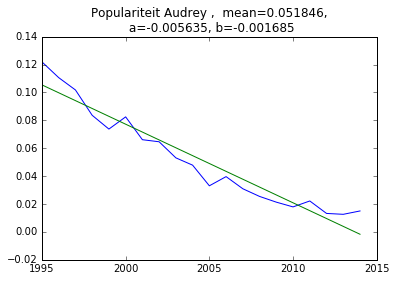

In [67]:
plot_trend('Audrey')

In [17]:
sum(voornamen_2014['Populariteit'] < 10 )

130

In [65]:
len(voornamen_2014)

120

In [70]:
voornamen_2014.sample(20)

,Rank,Naam,Populariteit,Lengte
117,0.077170,Sharon,102,6
179,0.122186,Daphne,67,6
566,0.418006,Joëlle,14,6
471,0.350482,Birgit,19,6
494,0.356913,Debbie,18,6
462,0.340836,Joanna,19,6
434,0.308682,Alyson,21,6
12,0.003215,Jolien,377,6
465,0.344051,Ariane,19,6
195,0.131833,Magali,60,6


## Old code

In [24]:
#raw_data_region['Lengte'] = raw_data_region['Naam'].str.len()
#raw_data_region['Rank'] = np.argsort(np.argsort(raw_data_region['Rank']))/len(raw_data_region)
#raw_data_region['Populariteit_rel'] = raw_data_region['Populariteit']/raw_data_region['Populariteit'].sum()



In [ ]:
def plot_trend(name, sex, region):
    try: 
        # Plot requested name
        to_plot = voornamen_pivot.loc[name,:].loc[sex,:].loc[region,:]/totals.loc[sex,:].loc[region,:]*10000
        plt.plot(to_plot.index, to_plot.values,'b-' , label = name)
        a,b = np.polyfit((to_plot.index-2014), to_plot.values, deg = 1)
        # Plot reference
        ref_name = popular_names[region][sex]
        to_plot_ref = voornamen_pivot.loc[ref_name,:].loc[sex,:].loc[region,:]/totals.loc[sex,:].loc[region,:]*10000
        plt.plot(to_plot_ref.index, to_plot_ref.values,'g-' , label = ref_name)        
        #plt.plot(to_plot.index, (to_plot.index-2014)*a  + b, 'b--')
        plt.title('Populariteit %s in %s, \n  on average %.2f babies per 10000 new borns' %(name,region, np.mean(to_plot.values)))
        plt.ylim(ymin=0)
        plt.ylabel('Number of babies per 10000')
        plt.xlabel('Year')
        plt.legend(loc='best')
        plt.grid()
    except:
        print('Naam not found')
        return
plot_trend('Maëli', 'Girl', 'Belgie')
popular_names = {'Vlaanderen': {'Girl':voornamen.loc[(voornamen['Year']==2014)&(voornamen['Region']=='Vlaanderen')&(voornamen['Sex']=='Girl'),:]\
        .sort_values(by='Count', ascending = False).ix[0,'Name'],
                               'Boy':voornamen.loc[(voornamen['Year']==2014)&(voornamen['Region']=='Vlaanderen')&(voornamen['Sex']=='Boy'),:]\
        .sort_values(by='Count', ascending = False).ix[0,'Name']},
                 'Belgie':{'Girl':voornamen.loc[(voornamen['Year']==2014)&(voornamen['Region']=='Belgie')&(voornamen['Sex']=='Girl'),:]\
        .sort_values(by='Count', ascending = False).ix[0,'Name'],
                               'Boy':voornamen.loc[(voornamen['Year']==2014)&(voornamen['Region']=='Belgie')&(voornamen['Sex']=='Boy'),:]\
        .sort_values(by='Count', ascending = False).ix[0,'Name']},
                'Wallonie':{'Girl':voornamen.loc[(voornamen['Year']==2014)&(voornamen['Region']=='Wallonie')&(voornamen['Sex']=='Girl'),:]\
        .sort_values(by='Count', ascending = False).ix[0,'Name'],
                               'Boy':voornamen.loc[(voornamen['Year']==2014)&(voornamen['Region']=='Wallonie')&(voornamen['Sex']=='Boy'),:]\
        .sort_values(by='Count', ascending = False).ix[0,'Name']},
                 'Brussel':{'Girl':voornamen.loc[(voornamen['Year']==2014)&(voornamen['Region']=='Brussel')&(voornamen['Sex']=='Girl'),:]\
        .sort_values(by='Count', ascending = False).ix[0,'Name'],
                               'Boy':voornamen.loc[(voornamen['Year']==2014)&(voornamen['Region']=='Brussel')&(voornamen['Sex']=='Boy'),:]\
        .sort_values(by='Count', ascending = False).ix[0,'Name']}
                }
popular_names